# Regressão Linear
***

## Importanto Bibliotecas

In [47]:
#Repositorio de datasets
!pip install ucimlrepo

In [48]:
# Bibliotecas de manipualção e visualização de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Acesso aos datasets
from ucimlrepo import fetch_ucirepo

# Classes dos modelo
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#Funções de avaliação dos modelos
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### **Estimando o salário**

In [49]:
salary = pd.read_csv('https://raw.githubusercontent.com/gabrielh10/ml_practice_tutoring/main/datasets/salary.csv')

É possível estimar o salário dado a experiência do funcionário?

In [50]:
salary.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [51]:
salary.shape

(40, 2)

### Separando o conjunto de dados

In [52]:
X = salary[['Experience Years']]
y = salary['Salary']

#Definindo semente
seed=42

#Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=seed)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 1), (12, 1), (28,), (12,))

### Treinando o modelo

A regressão linear é um modelo de regressão. Lembrando da fómula da equação linear: $y = a \times x  + b$

In [54]:
#Treinando o modelo de regressão
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [55]:
#Obtendo os coeficientes do modelo treinado
print("Coeficiente angular (a*x):", model.coef_)
print("Coeficiente Linear (b):", model.intercept_)
print("y =", model.coef_[0].round(3),"x +",model.intercept_.round(3))

Coeficiente angular (a*x): [9459.35953483]
Coeficiente Linear (b): 26767.86524944281
y = 9459.36 x + 26767.865


### Avaliando o modelo

MSE = $\frac{1}{n} \sum\limits_{i = 1}^{n}(y_i-\hat{y_i})^2$

O erro quadrático médio (Mean Squared Error) calcula a média dos quadrados dos erros, ou seja, as diferenças entre os valores reais ($y_i$) e os valores previstos ($\hat{y_i}$).

<!-- <img src="https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D2_ModelFitting/static/W1D2_Tutorial1_Solution_7a89ba24_0.png" alt="Descrição da MSE" width="600"/> -->

<div style="overflow: hidden;">
    <img src="https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D2_ModelFitting/static/W1D2_Tutorial1_Solution_7a89ba24_0.png" alt="Descrição da MSE" style="margin-top: -30px; width: 600px;"/>
</div>

In [56]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))

MSE: 35344480.17477033
R2_score: 0.9439054952900567


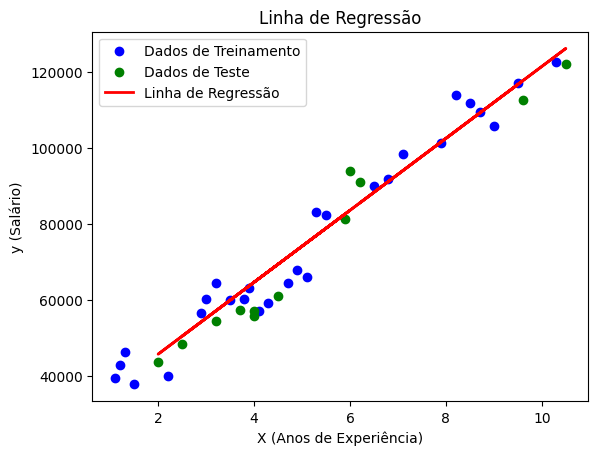

In [57]:
# Dados de treinamento e teste
plt.scatter(X_train, y_train, color='blue', label='Dados de Treinamento')
plt.scatter(X_test, y_test, color='green', label='Dados de Teste')

# Linha de regressão
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')

plt.xlabel('X (Anos de Experiência)')
plt.ylabel('y (Salário)')
plt.title('Linha de Regressão')
plt.legend()
plt.show()

In [58]:
difference_pred = pd.DataFrame({"True Value": y_test, "Predicted value": y_pred, "Difference": y_test-y_pred}).round(2)
difference_pred

,True Value,Predicted value,Difference
19,61111,69334.98,-8223.98
16,56957,64605.30,-7648.30
15,55794,64605.30,-8811.30
26,93940,83524.02,10415.98
4,43525,45686.58,-2161.58
12,57189,61767.50,-4578.50
37,112635,117577.72,-4942.72
27,91000,85415.89,5584.11
39,121872,126091.14,-4219.14
6,48266,50416.26,-2150.26


In [59]:
#Calculando o MSE "Manualmente"
sum(difference_pred['Difference'] ** 2)/len(difference_pred)

35344480.20711667

### Como usar o modelo de regressão criado para novos dados?

In [60]:
experience_years = 5
new_data = pd.DataFrame({'Experience Years':[experience_years]})
result = model.predict(new_data)
print("O resultado estimado pelo modelo de regressão linear foi:", result[0].round(2))

O resultado estimado pelo modelo de regressão linear foi: 74064.66


### **Exemplo com outro dataset (Iris)**

É possível estimar o tamanho da pétala considerando as outras features?

In [61]:
# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

dataset = pd.DataFrame(X)

X = dataset[['sepal length', 'sepal width', 'petal width']]
y = dataset['petal length']
dataset

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
X

,sepal length,sepal width,petal width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print(X_train.shape)
print(X_test.shape)

(105, 3)
(45, 3)


In [64]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = regression_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))

MSE: 0.1091900957932912
R2_score: 0.9676184058630728


### **Mais um exemplo (house) dataset**

**House-16H dataset**:

A tarefa é prever o preço médio da casa na região com base na composição demográfica e no estado do mercado imobiliário na região.

[Saiba mais aqui](https://sci2s.ugr.es/keel/dataset.php?cod=95#sub1)

In [66]:
dataset = pd.read_csv("https://raw.githubusercontent.com/gabrielh10/ml_practice_tutoring/main/datasets/house.csv")

In [67]:
dataset.columns

Index(['Price', 'P1', ' P5p1', ' P6p2', ' P11p4', ' P14p9', ' P15p1', ' P15p3',
       ' P16p2', ' P18p2', ' P27p4', ' H2p2', ' H8p2', ' H10p1', ' H13p1',
       ' H18pA', ' H40p4'],
      dtype='object')

In [68]:
dataset.head(10)

,Price,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
0,14999,219,0.506849,0.031963,0.146119,0.101852,0.876712,0.000000,0.746988,0.012048,0.060241,0.231482,0.024096,0.987952,0.351852,0.000000,0.800000
1,106200,2273,0.495381,0.018918,0.067312,0.045336,0.794545,0.016718,0.641053,0.002105,0.076842,0.064961,0.017895,0.997895,0.170276,0.054217,0.258064
2,14999,564,0.457447,0.058511,0.299645,0.238562,0.764184,0.010638,0.567273,0.003636,0.014545,0.140625,0.054545,0.996364,0.381250,0.056180,1.000000
3,29900,620,0.495161,0.003226,0.104839,0.086262,0.909677,0.000000,0.792793,0.009009,0.027027,0.051282,0.004504,0.995495,0.183761,0.162791,0.000000
4,85900,3809,0.491730,0.205303,0.107115,0.085744,0.899449,0.000000,0.766566,0.008283,0.039910,0.017024,0.200301,0.985693,0.198372,0.106557,0.666667
5,14999,133,0.466165,0.000000,0.248120,0.239437,0.812030,0.000000,0.644068,0.016949,0.016949,0.271605,0.000000,1.000000,0.197531,0.000000,1.000000
6,25500,267,0.460674,0.000000,0.134831,0.131944,0.913858,0.000000,0.776596,0.000000,0.021277,0.153153,0.000000,0.989362,0.297297,0.240000,0.000000
7,23800,248,0.491936,0.161290,0.197581,0.126984,0.911290,0.000000,0.787234,0.000000,0.021277,0.104762,0.127660,1.000000,0.161905,0.115385,1.000000
8,134600,6614,0.498790,0.004687,0.072120,0.058220,0.937406,0.000000,0.847794,0.001983,0.039167,0.014656,0.004462,0.994546,0.100147,0.134503,0.400000
9,28900,22995,0.492890,0.001000,0.039356,0.034560,0.978213,0.000000,0.926131,0.003436,0.012789,0.038539,0.001336,0.070624,0.467058,0.364839,0.782609


In [69]:
dataset.shape

(22784, 17)

In [70]:
dataset.describe()

,Price,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
count,22784.000000,2.278400e+04,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000
mean,50074.439782,7.808669e+03,0.482297,0.063982,0.163900,0.121538,0.851076,0.020487,0.716131,0.003589,0.033263,0.110527,0.057437,0.967045,0.304993,0.107377,0.491626
std,52843.475551,6.587242e+04,0.031876,0.150921,0.080461,0.056687,0.079455,0.057666,0.087264,0.005100,0.029567,0.105925,0.139811,0.099953,0.133998,0.090065,0.331655
min,0.000000,2.000000e+00,0.125000,0.000000,0.000000,0.000000,0.054156,0.000000,0.233702,0.000000,0.000000,0.000000,0.000000,0.003257,0.000000,0.000000,0.000000
25%,21000.000000,4.270000e+02,0.464647,0.000000,0.112069,0.081236,0.819686,0.000000,0.662283,0.000000,0.016260,0.049303,0.000000,0.981410,0.221673,0.052770,0.243243
50%,33200.000000,1.345500e+03,0.480396,0.003413,0.155485,0.117127,0.863645,0.000000,0.714286,0.002591,0.027523,0.081179,0.002538,0.994100,0.299800,0.086957,0.500000
75%,56100.000000,4.518250e+03,0.496040,0.033376,0.203596,0.156757,0.899657,0.019196,0.771039,0.005007,0.042827,0.131430,0.029928,1.000000,0.375000,0.137931,0.750000
max,500001.000000,7.322564e+06,0.923077,1.000000,0.917255,0.511872,1.000000,0.943325,1.000000,0.125000,0.705736,0.975177,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
X = dataset.drop(["Price"], axis = 1)
# remoção é feita nas colunas (eixo 1), não nas linhas (eixo 0)
y = dataset["Price"]
X

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
0,219,0.506849,0.031963,0.146119,0.101852,0.876712,0.000000,0.746988,0.012048,0.060241,0.231482,0.024096,0.987952,0.351852,0.000000,0.800000
1,2273,0.495381,0.018918,0.067312,0.045336,0.794545,0.016718,0.641053,0.002105,0.076842,0.064961,0.017895,0.997895,0.170276,0.054217,0.258064
2,564,0.457447,0.058511,0.299645,0.238562,0.764184,0.010638,0.567273,0.003636,0.014545,0.140625,0.054545,0.996364,0.381250,0.056180,1.000000
3,620,0.495161,0.003226,0.104839,0.086262,0.909677,0.000000,0.792793,0.009009,0.027027,0.051282,0.004504,0.995495,0.183761,0.162791,0.000000
4,3809,0.491730,0.205303,0.107115,0.085744,0.899449,0.000000,0.766566,0.008283,0.039910,0.017024,0.200301,0.985693,0.198372,0.106557,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22779,50618,0.479335,0.021870,0.148801,0.095921,0.884093,0.016615,0.770297,0.004876,0.034184,0.168155,0.018297,0.893886,0.353081,0.136044,0.542948
22780,1090,0.473394,0.020184,0.228440,0.156794,0.794495,0.069725,0.664286,0.000000,0.016667,0.088937,0.009524,0.976190,0.344902,0.097744,0.600000
22781,8272,0.473404,0.009188,0.135880,0.081726,0.774903,0.000000,0.630696,0.002516,0.115180,0.037665,0.008946,0.969248,0.243207,0.042318,0.483871
22782,1438,0.486787,0.006954,0.136300,0.120596,0.849791,0.053547,0.740891,0.002024,0.018219,0.044487,0.002024,0.975708,0.234043,0.090909,0.625000


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=seed)

In [73]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))

MSE: 2122913925.9449828
R2_score: 0.2673135834998861


In [74]:
pred_y_df = pd.DataFrame({"True Value": y_test, "Predicted value": y_pred, "Difference": y_test-y_pred}).round(2)
pred_y_df

,True Value,Predicted value,Difference
18788,20600,41338.07,-20738.07
5859,17800,36375.77,-18575.77
4634,62200,66695.08,-4495.08
21895,29200,55883.80,-26683.80
3115,32300,32673.94,-373.94
...,...,...,...
20937,81700,73660.12,8039.88
1540,14999,11223.98,3775.02
10915,34400,42830.19,-8430.19
2697,14999,72155.57,-57156.57


**PERGUNTA**: Por que o modelo tem um desempenho tão baixo?

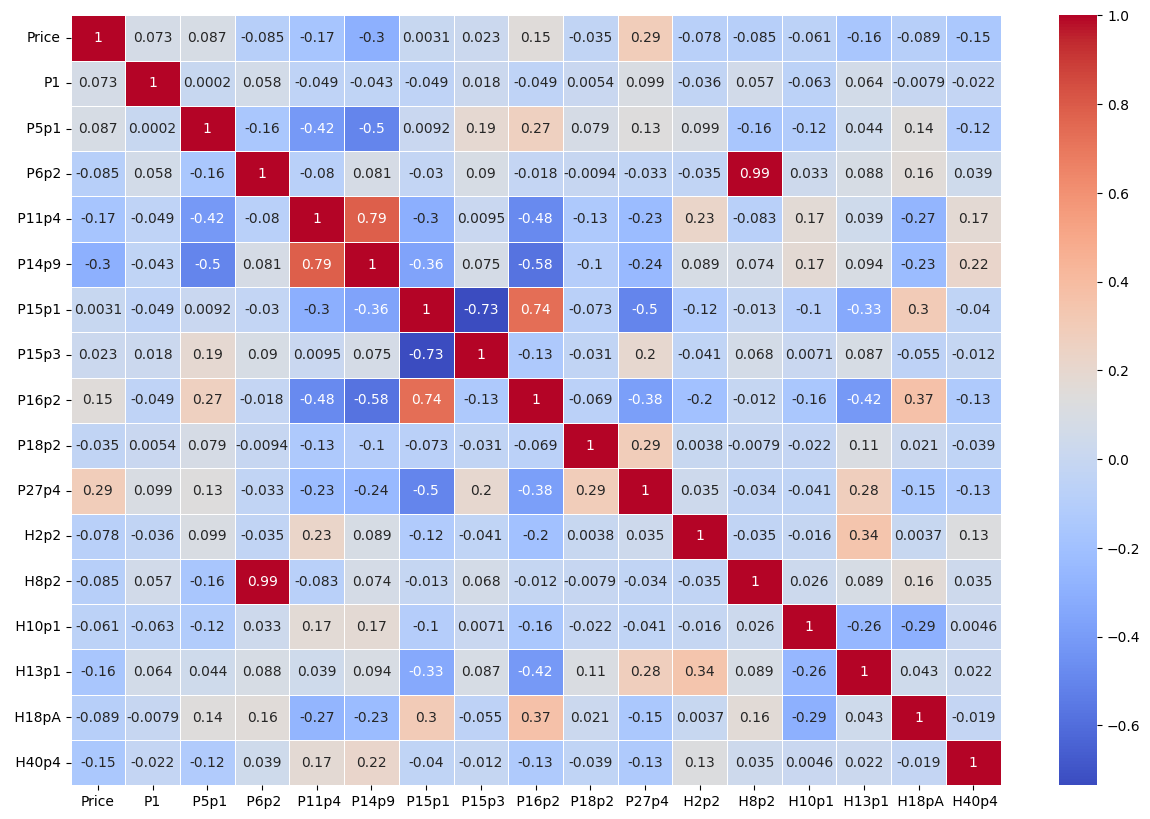

In [75]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

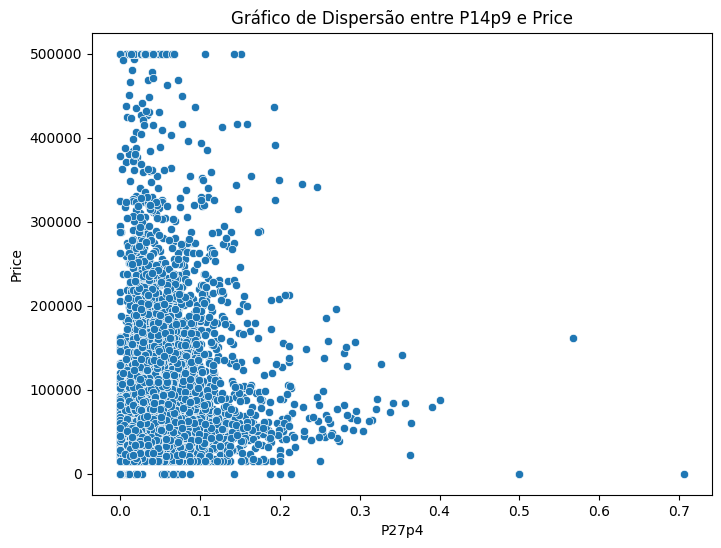

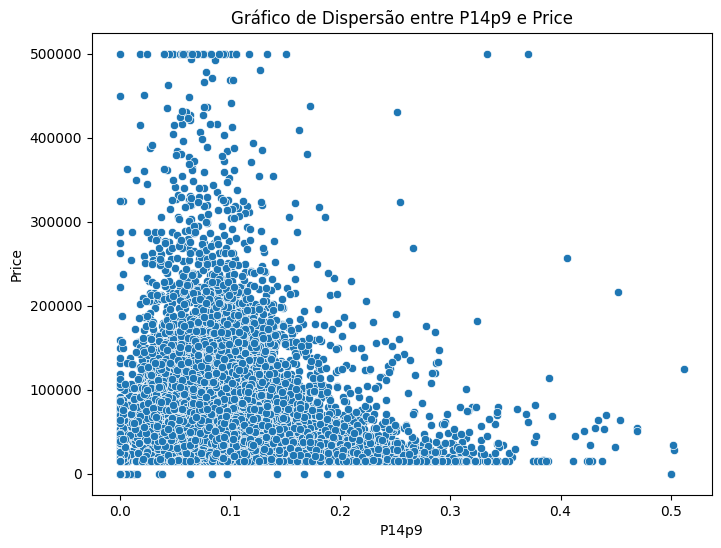

In [76]:
#Gráficos de dispersão das variáveis com maior correlação com o Alvo da regressão (Price)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=' P27p4', y='Price', data=dataset)
plt.title('Gráfico de Dispersão entre P14p9 e Price')
plt.xlabel('P27p4')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=' P14p9', y='Price', data=dataset)
plt.title('Gráfico de Dispersão entre P14p9 e Price')
plt.xlabel('P14p9')
plt.ylabel('Price')
plt.show()

##KNN Para Regressão

In [77]:
knn_regression_model = KNeighborsRegressor(n_neighbors=7, metric="euclidean")
knn_regression_model.fit(X_train, y_train)

y_pred = knn_regression_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))

MSE: 2683981029.7673717
R2_score: 0.07367113728872621
